In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv("crx.csv",
                 na_values='?')
df.head()

,b,30.83,0,u,g,w,v,1.25,t,t.1,1,f,g.1,202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360.0,0,+


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   b       677 non-null    object 
 1   30.83   677 non-null    float64
 2   0       689 non-null    float64
 3   u       683 non-null    object 
 4   g       683 non-null    object 
 5   w       680 non-null    object 
 6   v       680 non-null    object 
 7   1.25    689 non-null    float64
 8   t       689 non-null    object 
 9   t.1     689 non-null    object 
 10  1       689 non-null    int64  
 11  f       689 non-null    object 
 12  g.1     689 non-null    object 
 13  202     676 non-null    float64
 14  0.1     689 non-null    int64  
 15  +       689 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.2+ KB


In [22]:
df.isna().sum()

b        12
30.83    12
0         0
u         6
g         6
w         9
v         9
1.25      0
t         0
t.1       0
1         0
f         0
g.1       0
202      13
0.1       0
+         0
dtype: int64

In [23]:
#continous data
cont_att = [1, 2, 7, 10, 13, 14]

#discrete data
dis_att = []
for i in range(1, 16):
    if i not in cont_att:
        dis_att.append(i)

cont_att, dis_att

([1, 2, 7, 10, 13, 14], [3, 4, 5, 6, 8, 9, 11, 12, 15])

In [24]:
for index in range(len(df.columns)):
    column_name = df.columns[index]
    if index in cont_att:  # Adjusting for 1-based indexing in cont_att
        df[column_name].fillna(df[column_name].mean(), inplace=True)
    else:
        df[column_name].fillna(df[column_name].mode()[0], inplace=True)
        # Filling missing values with mean for continuous and mode for discrete

print(df.isna().sum())

b        0
30.83    0
0        0
u        0
g        0
w        0
v        0
1.25     0
t        0
t.1      0
1        0
f        0
g.1      0
202      0
0.1      0
+        0
dtype: int64


In [25]:
#normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cont_att = df.columns[[1, 2, 7, 10, 13, 14]].tolist()
df[cont_att] = scaler.fit_transform(df[cont_att])
df[cont_att].head()

,30.83,0,1.25,1,202,0.1
0,0.675489,0.159286,0.106667,0.089552,0.0215,0.00560
1,0.161654,0.017857,0.052632,0.000000,0.1400,0.00824
2,0.211729,0.055000,0.131579,0.074627,0.0500,0.00003
3,0.096541,0.200893,0.060000,0.000000,0.0600,0.00000
4,0.275639,0.142857,0.087719,0.000000,0.1800,0.00000


In [26]:
from sklearn.preprocessing import OneHotEncoder
one_hot  = OneHotEncoder(sparse = False)
# Get column names from positions
dis_att_cols = df.columns[dis_att].tolist()

# Then use these names for one-hot encoding
one_hot_data = one_hot.fit_transform(df[dis_att_cols])
one_hot_data = pd.DataFrame(one_hot_data, 
                          columns=one_hot.get_feature_names_out(dis_att_cols))

C:\Users\USer\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [27]:
#Convert the target variable to binary
df['+'] = df['+'].map({'+': 1, '-': 0})
df['+'].value_counts()

+
0    383
1    306
Name: count, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
x = df.drop(columns='+')
y = df['+']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   


In [29]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Example for ordinal encoding:
ordinal_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
encoder = OrdinalEncoder()
X_train[ordinal_cols] = encoder.fit_transform(X_train[ordinal_cols])
X_test[ordinal_cols] = encoder.transform(X_test[ordinal_cols])

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
print(f"Accuracy: {score:.2f}")


Accuracy: 0.76


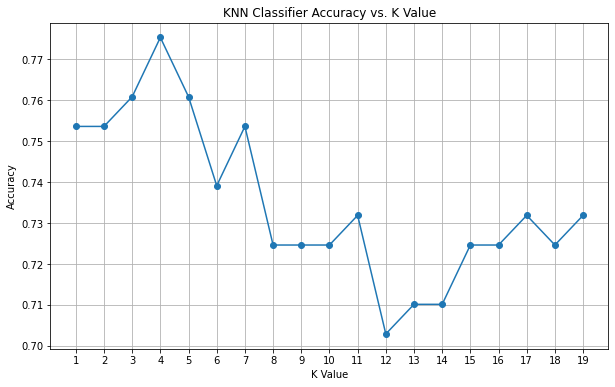

In [31]:
list_of_scores = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    list_of_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), list_of_scores, marker='o')
plt.title('KNN Classifier Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(range(1, 20))
plt.grid()
plt.show()

In [33]:
scores = np.array(list_of_scores)
index_max = np.argmax(scores)
print(index_max+1) 

4
